# **Initialisation**

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean

# Données de coordonnées spatiales des villes
coordinates = {
    "Paris": (48.8566, 2.3522),
    "New York": (40.7128, -74.0060),
    "Los Angeles": (34.0522, -118.2437),
    "Londres": (51.5074, -0.1278),
    "Chicago": (41.8781, -87.6298),
    "San Francisco": (37.7749, -122.4194),
    "Tokyo": (35.6895, 139.6917),
    "Berlin": (52.5200, 13.4050),
    "Moscou": (55.7558, 37.6173),
    "Sydney": (-33.8688, 151.2093),
    "Rio de Janeiro": (-22.9068, -43.1729),
    "Le Caire": (30.0444, 31.2357),
    "Toronto": (43.6511, -79.3834),
    "Mumbai": (19.0760, 72.8777),
    "Beijing": (39.9042, 116.4074),
    "Mexico City": (19.4326, -99.1332),
    "Cape Town": (-33.9249, 18.4241),
    "Istanbul": (41.0082, 28.9784),
    "Dubai": (25.276987, 55.296249),
    "Buenos Aires": (-34.6037, -58.3816),
    "Johannesburg": (-26.2041, 28.0473),
    "Hong Kong": (22.3193, 114.1694),
    "Sao Paulo": (-23.5505, -46.6333),
    "Milan": (45.4642, 9.1900),
    "Madrid": (40.4168, -3.7038),
    "Singapore": (1.3521, 103.8198),
    "Bangkok": (13.7563, 100.5018),
    "Jakarta": (-6.2088, 106.8456),
    "Seoul": (37.5665, 126.9780),
    "Lagos": (6.5244, 3.3792),
    "Rome": (41.9028, 12.4964),
    "Vienna": (48.2082, 16.3738),
    "Zürich": (47.3769, 8.5417)
}


# Initialisation des centres de cluster
A = np.array(coordinates["Paris"])
B = np.array(coordinates["New York"])


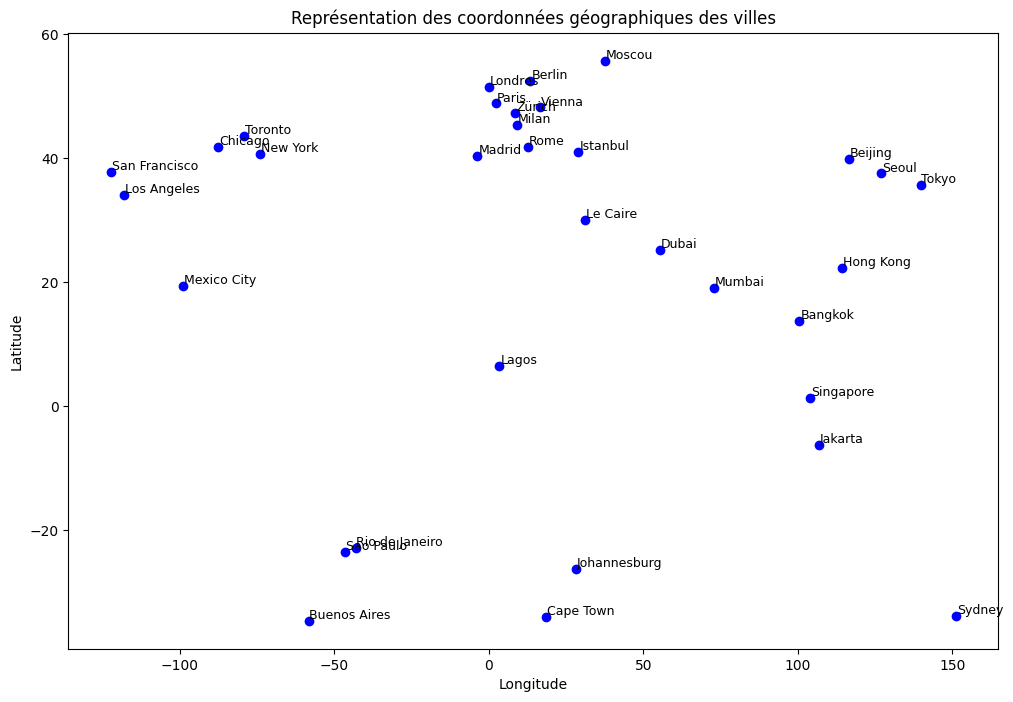

In [ ]:
import matplotlib.pyplot as plt

# Séparation des coordonnées pour l'affichage
latitudes = [coord[0] for coord in coordinates.values()]
longitudes = [coord[1] for coord in coordinates.values()]
labels = list(coordinates.keys())

# Création du graphique
plt.figure(figsize=(12, 8))
plt.scatter(longitudes, latitudes, color='blue')

# Ajout des labels pour chaque point
for i, label in enumerate(labels):
    plt.text(longitudes[i] + 0.3, latitudes[i] + 0.3, label, fontsize=9)

plt.title("Représentation des coordonnées géographiques des villes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
def assign_clusters(coordinates, A, B):
    cluster_1 = []
    cluster_2 = []

    for city, coord in coordinates.items():
        dist_to_A = euclidean(coord, A)
        dist_to_B = euclidean(coord, B)

        if dist_to_A < dist_to_B:
            cluster_1.append(city)
        else:
            cluster_2.append(city)

    return cluster_1, cluster_2

# Attribution initiale des points
cluster_1, cluster_2 = assign_clusters(coordinates, A, B)
print("Cluster 1:", cluster_1)
print("Cluster 2:", cluster_2)

Cluster 1: ['Paris', 'Londres', 'Tokyo', 'Berlin', 'Moscou', 'Sydney', 'Le Caire', 'Mumbai', 'Beijing', 'Cape Town', 'Istanbul', 'Dubai', 'Johannesburg', 'Hong Kong', 'Milan', 'Madrid', 'Singapore', 'Bangkok', 'Jakarta', 'Seoul', 'Lagos', 'Rome', 'Vienna', 'Zürich']
Cluster 2: ['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Rio de Janeiro', 'Toronto', 'Mexico City', 'Buenos Aires', 'Sao Paulo']


In [ ]:
def update_centroids(coordinates, cluster_1, cluster_2):
    if cluster_1:
        A_new = np.mean([coordinates[city] for city in cluster_1], axis=0)
    else:
        A_new = A

    if cluster_2:
        B_new = np.mean([coordinates[city] for city in cluster_2], axis=0)
    else:
        B_new = B

    return A_new, B_new

# Mise à jour des centres de cluster
A, B = update_centroids(coordinates, cluster_1, cluster_2)
print("Nouveau Centre A:", A)
print("Nouveau Centre B:", B)


Nouveau Centre A: [25.17999946 53.91693538]
Nouveau Centre B: [ 15.16007778 -81.00036667]


In [ ]:
def k_means(coordinates, A, B, max_iterations=100, tolerance=1e-4):
    for _ in range(max_iterations):
        cluster_1, cluster_2 = assign_clusters(coordinates, A, B)
        A_new, B_new = update_centroids(coordinates, cluster_1, cluster_2)

        # Vérification de la convergence
        if euclidean(A, A_new) < tolerance and euclidean(B, B_new) < tolerance:
            break

        A, B = A_new, B_new

    return cluster_1, cluster_2, A, B

# Exécution de l'algorithme k-means
final_cluster_1, final_cluster_2, final_A, final_B = k_means(coordinates, A, B)
print("Cluster 1 final:", final_cluster_1)
print("Cluster 2 final:", final_cluster_2)
print("Centre final A:", final_A)
print("Centre final B:", final_B)


Cluster 1 final: ['Paris', 'Londres', 'Tokyo', 'Berlin', 'Moscou', 'Sydney', 'Le Caire', 'Mumbai', 'Beijing', 'Cape Town', 'Istanbul', 'Dubai', 'Johannesburg', 'Hong Kong', 'Milan', 'Madrid', 'Singapore', 'Bangkok', 'Jakarta', 'Seoul', 'Lagos', 'Rome', 'Vienna', 'Zürich']
Cluster 2 final: ['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Rio de Janeiro', 'Toronto', 'Mexico City', 'Buenos Aires', 'Sao Paulo']
Centre final A: [25.17999946 53.91693538]
Centre final B: [ 15.16007778 -81.00036667]


Centres des clusters finaux :
[[ 31.64891247  17.4337166 ]
 [ 15.16007778 -81.00036667]
 [ 14.39847778 114.7223    ]]


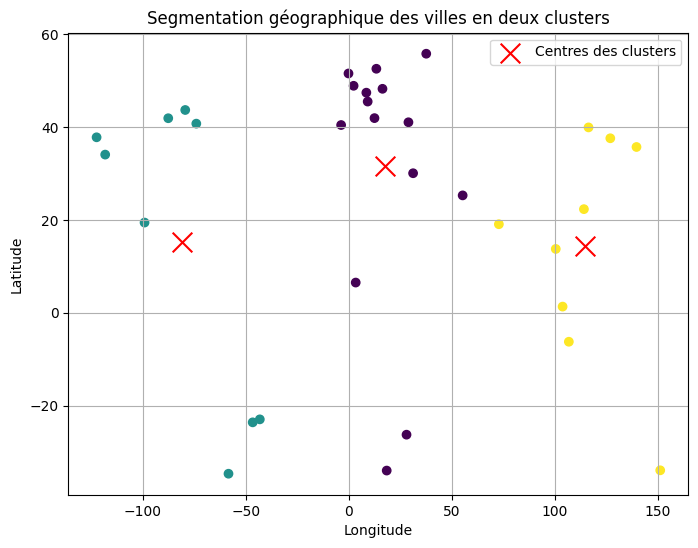

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Dictionnaire des coordonnées spatiales des villes
coordinates = {
    "Paris": (48.8566, 2.3522),
    "New York": (40.7128, -74.0060),
    "Los Angeles": (34.0522, -118.2437),
    "Londres": (51.5074, -0.1278),
    "Chicago": (41.8781, -87.6298),
    "San Francisco": (37.7749, -122.4194),
    "Tokyo": (35.6895, 139.6917),
    "Berlin": (52.5200, 13.4050),
    "Moscou": (55.7558, 37.6173),
    "Sydney": (-33.8688, 151.2093),
    "Rio de Janeiro": (-22.9068, -43.1729),
    "Le Caire": (30.0444, 31.2357),
    "Toronto": (43.6511, -79.3834),
    "Mumbai": (19.0760, 72.8777),
    "Beijing": (39.9042, 116.4074),
    "Mexico City": (19.4326, -99.1332),
    "Cape Town": (-33.9249, 18.4241),
    "Istanbul": (41.0082, 28.9784),
    "Dubai": (25.276987, 55.296249),
    "Buenos Aires": (-34.6037, -58.3816),
    "Johannesburg": (-26.2041, 28.0473),
    "Hong Kong": (22.3193, 114.1694),
    "Sao Paulo": (-23.5505, -46.6333),
    "Milan": (45.4642, 9.1900),
    "Madrid": (40.4168, -3.7038),
    "Singapore": (1.3521, 103.8198),
    "Bangkok": (13.7563, 100.5018),
    "Jakarta": (-6.2088, 106.8456),
    "Seoul": (37.5665, 126.9780),
    "Lagos": (6.5244, 3.3792),
    "Rome": (41.9028, 12.4964),
    "Vienna": (48.2082, 16.3738),
    "Zürich": (47.3769, 8.5417)
}

# Conversion des coordonnées en tableau NumPy pour KMeans
coordinates_array = np.array(list(coordinates.values()))

# Initialisation de KMeans avec 2 clusters
kmeans = KMeans(n_clusters=3, init=np.array([
    [48.8566, 2.3522],   # Initialisation de A avec Paris
    [40.7128, -74.0060],  # Initialisation de B avec New York
    [40.7128, -74.0060]   # Initialisation de C avec Chicago
]), n_init=1)

# Ajustement du modèle aux données
kmeans.fit(coordinates_array)

# Récupération des centres des clusters et des labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Affichage des résultats
print("Centres des clusters finaux :")
print(centers)


# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(coordinates_array[:, 1], coordinates_array[:, 0], c=labels, cmap='viridis', marker='o')
plt.scatter(centers[:, 1], centers[:, 0], c='red', marker='x', s=200, label='Centres des clusters')
plt.title("Segmentation géographique des villes en deux clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.legend()
plt.show()
